#Introduction

In this notebook, we plan to explore the correlation, if any, between fast food restaurant count in a state and the obesity rate of the people in that same state. We will use two datasets and run EDA and analyses to demonstrate and come to a conclusion if there is a correlation.

## Objectives

Data Collection: Load datasets from different sources.

Data Exploration: Examine the structure and content of each dataset.

Data Preprocessing: Clean and prepare the data for integration.

Data Integration: Merge the datasets based on a common key.

Handling Challenges: Address issues such as data heterogeneity, missing data, and inconsistent country names.

Data Analysis: Compute cases and deaths per capita.

Visualization: Visualize the results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import nltk
from datetime import datetime
!pip install rapidfuzz -q
from rapidfuzz import fuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.8 MB/s eta 0:00:00


# Datasets Used

**Fast Food Restaurant - Datafiniti's Business Database** This dataset was downloaded off of Kaggle and lists 10,000 fast food restuarants and where they are located. This is a sample of a large dataset.

**Obesity Dataset -- Data.gov database** This dataset gives the national obesity percentages by state from a CDC BRFSS Survey.

# Importing Datasets

In [2]:
obesity_df = pd.read_csv("Obesity_by_State.csv")
fast_food_df = pd.read_csv("fast_food.csv")

**Obesity Dataframe Attributes:**

OBJECTID (int64): unique number for each state

NAME (object): state name

Obesity (float64): obesity rate

Shape__Area (float64): area of state

Shape__Length (float64): length of state

**Fast Food Datatable -- some columns not of note or have no explanation**

id (object): unqiue id for each row

Date Attributes:  dateAdded (object) and dateUpdated (object)
address	(object): address of restuarant
categories	(object): type of restaurant
city	(object): city location
country	(object): country location
keys	(object):
latitude	(float64)
longitude	(float64)
name	(object): restaurant name
postalCode	(object): zip code
province	(object): state code
sourceURLs	(object)
websites	(object)

In [3]:
obesity_df.head()

,OBJECTID,NAME,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.672329e+12,1.540832e+07
1,2,California,24.2,5.327809e+12,1.451870e+07
2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
3,4,Georgia,30.7,1.652980e+12,5.795596e+06
4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06


In [4]:
fast_food_df.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [5]:
obesity_df.dtypes

,0
OBJECTID,int64
NAME,object
Obesity,float64
Shape__Area,float64
Shape__Length,float64


#Understanding the Datasets

We want to dive deeper into the fast food resturant dataset in order to gain a better understanding of what the data is trying to tell us.



In [6]:
print("Dataset dimension:")
print(fast_food_df.shape)

Dataset dimension:
(10000, 15)


In [7]:
fast_food_df.dtypes

,0
id,object
dateAdded,object
dateUpdated,object
address,object
categories,object
city,object
country,object
keys,object
latitude,float64
longitude,float64


In [8]:
#convert date columns to datetime attirbtues

fast_food_df['dateAdded'] = fast_food_df['dateAdded'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
fast_food_df['dateUpdated'] = fast_food_df['dateUpdated'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
#check dtypes to see if it worked
fast_food_df.dtypes

,0
id,object
dateAdded,datetime64[ns]
dateUpdated,datetime64[ns]
address,object
categories,object
city,object
country,object
keys,object
latitude,float64
longitude,float64


In [9]:
#how many resturants are recorded
print("Number of unique restaurant:", fast_food_df['name'].nunique())

Number of unique restaurant: 571


Text(0, 0.5, 'count')

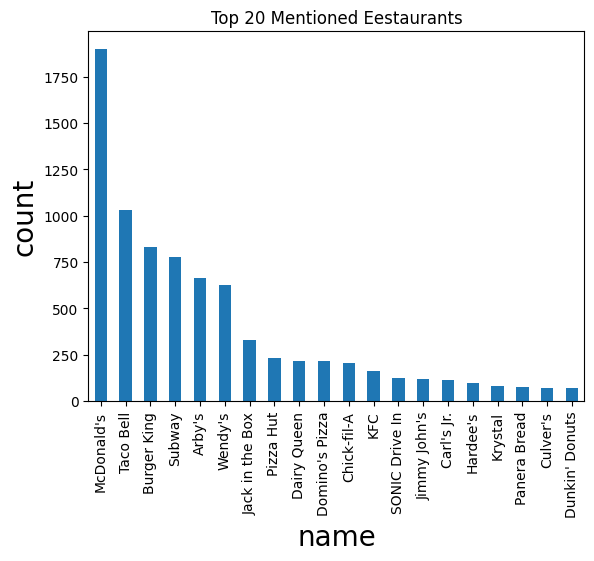

In [10]:
#visualize top 20
nameplot=fast_food_df['name'].value_counts()[:20].plot.bar(title='Top 20 Mentioned Eestaurants')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

We can see that McDonald's, taco bell , and burger king are the Top 3 mentioned places to eat fast food. But we need more daat cleaning to dive deeper into these resturants

In class we learned about the Jaro-Winkler Similarity and fuzzy matching theoretics when looking at similarity across strings. We want to also run this analysis on the resturant name to ensure that resturants with the same names are considered one even if they are spelled differently.

In [11]:
restaurant_names = fast_food_df['name'].unique()
similar_names = {}

# Threshold for considering names similar (you can adjust this value)
similarity_threshold = 90

# Loop through the names to find similar ones and map them to a canonical version
for i in range(len(restaurant_names)):
    # Set the current name as the canonical version (first appearance)
    first_appearance = restaurant_names[i]

    # Loop through the list to find similar names
    for j in range(i + 1, len(restaurant_names)):  # Skip previously compared ones
        # Get the Jaro-Winkler similarity score
        similarity = fuzz.WRatio(restaurant_names[i].lower(), restaurant_names[j].lower())

        if similarity >= similarity_threshold:
            # Map the similar name to the canonical name
            similar_names[restaurant_names[j]] = first_appearance

# Map the similar names to the canonical names in the fast_food_df DataFrame
fast_food_df['name'] = fast_food_df['name'].replace(similar_names)

# Check if the names are successfully standardized
print(fast_food_df['name'].unique())

['SONIC Drive In' 'Taco Bell' "Arby's" "Steak 'n Shake" "Wendy's"
 'Burger King' 'Chipotle Mexican Grill' '7-Eleven' 'Dairy Queen'
 'Mr. Hero' 'Golden Chick' "Carl's Jr" 'Checkers' "Rally's" "Togo's"
 'Little Q Hot Pot' "McDonald's" 'Five Guys' 'Boston Road Pizza'
 'Boston Market' "D'Angelo Grilled Sandwiches" "Nino's Pizzarama"
 "Filippi's Pizza Grotto" 'Jack in the Box' 'Round Table Pizza'
 'El Pollo Loco' 'In-N-Out Burger' 'Copper Oven Artisan Pizza' 'Del Taco'
 'Little Caesars Pizza' 'Sbarro' "Casey's General Store" 'SUBWAY'
 "Fat Patty's" 'Pizza Hut' "Culver's" 'KFC' 'Whataburger' 'Chick-Fil-A'
 'Firehouse Subs' "Cupie's Drive-In" "Primo's Pizza"
 "Simple Simon's Pizza" 'CASA Mexicana' 'Bob Evans' 'Players Grill'
 'Back Yard Burgers' "Italo's Pizza" 'Hunan Gardens' 'Toppers Pizza'
 'Hernandez Mexican Restaurant' 'Glorious Foods Gourmet to go & Catering'
 "Schlotzsky's" 'Chicken Express' 'Big House Burgers'
 "Jerry's Subs & Pizza" "Fox's Pizza Den" 'Pizza Pub'
 'Grande Italian Rest

Number of unique cities: 2764


Text(0, 0.5, 'count')

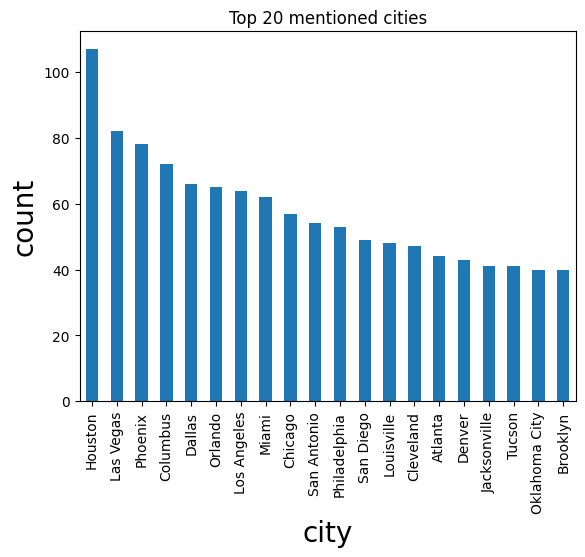

In [12]:
# top 20 fast food populated cities recorded by count total
print("Number of unique cities:", fast_food_df['city'].nunique())
nameplot = fast_food_df['city'].value_counts()[:20].plot.bar(title='Top 20 mentioned cities')
nameplot.set_xlabel('city',size=20)
nameplot.set_ylabel('count',size=20)

In [13]:
from plotly.offline import init_notebook_mode, iplot
state_codes = fast_food_df['province'].value_counts().index.tolist()
value_counts_by_states = fast_food_df['province'].value_counts()

# plotly choropleth
data= [dict(type='choropleth',
            locations = state_codes,
            z = value_counts_by_states, #color code
            locationmode = 'USA-states',
            colorscale = 'Reds',
            marker_line_color = 'white',
            colorbar_title = "Number of Fast Food Restaurants"
        )]
layout = dict(title = '2019 US Fast Food Restaurants by State',
              geo = dict(scope='usa'))
iplot(dict(data=data, layout=layout))

In [14]:
data = [dict(type = 'scattergeo',
            locationmode = 'USA-states',
            lon = fast_food_df['longitude'],
            lat = fast_food_df['latitude'],
            mode = 'markers',
            marker = dict(size = 3,
                opacity = 0.7,
                reversescale = True,
                autocolorscale = False,
                symbol = 'circle',
                line = dict(width=.5, color='black'),
                color = 'red'
            )
        )]

layout = dict(title = '2019 US Fast Food Restaurants by GPS',
            geo = dict(scope='usa',
                showland = True,
                landcolor = "rgb(250, 250, 250)",
                subunitcolor = "rgb(217, 217, 217)"
            )
        )
iplot(dict(data=data, layout=layout ))

# Data Preprocessing

In [15]:
#rename state column to match between datasets
obesity_df.rename(columns={"NAME": "State"}, inplace=True)
fast_food_df.rename(columns = {'province': "State_Code"}, inplace = True)

In [16]:
print(obesity_df.isnull().sum())
print(fast_food_df.isnull().sum())

OBJECTID         0
State            0
Obesity          0
Shape__Area      1
Shape__Length    1
dtype: int64
id             0
dateAdded      0
dateUpdated    0
address        0
categories     0
city           0
country        0
keys           0
latitude       0
longitude      0
name           0
postalCode     0
State_Code     0
sourceURLs     0
websites       0
dtype: int64


In [17]:
#fillna shape area and shape length to unknown
obesity_df['Shape__Area'] = obesity_df['Shape__Area'].fillna(0.00)
obesity_df['Shape__Length'] = obesity_df['Shape__Length'].fillna(0.00)

In [18]:
#check to make sure no more missing values
print(obesity_df.isnull().sum())

OBJECTID         0
State            0
Obesity          0
Shape__Area      0
Shape__Length    0
dtype: int64


In [19]:
print(len(obesity_df['State'].unique()))

52


In [20]:
#drop uneeded columns
obesity_df.drop(columns=['OBJECTID', 'Shape__Area', 'Shape__Length'], inplace = True)
fast_food_df.drop(columns = ['id', 'keys', 'latitude', 'longitude', 'sourceURLs', 'websites'], inplace = True)

In [21]:
#need to map names for states in fast food csv

state_code_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

fast_food_df['State'] = fast_food_df['State_Code'].map(state_code_to_name)


In [22]:
# look at number of fast food in each state
fast_food_count = fast_food_df.groupby('State').size().reset_index(name='Fast_Food_Count')
print("Number of fast food restaurants in each state:\n", fast_food_count)

Number of fast food restaurants in each state:
              State  Fast_Food_Count
0          Alabama                6
1           Alaska               16
2          Arizona              330
3         Arkansas              102
4       California             1201
5         Colorado              148
6      Connecticut               53
7         Delaware               44
8          Florida              621
9          Georgia              420
10          Hawaii               32
11           Idaho               51
12        Illinois              405
13         Indiana              254
14            Iowa              115
15          Kansas               74
16        Kentucky              166
17       Louisiana              202
18           Maine               25
19        Maryland              172
20   Massachusetts              205
21        Michigan              374
22       Minnesota              199
23     Mississippi               55
24        Missouri              163
25         Monta

#Merging the Datasets on State

In [23]:
#merging datasets
merged_df = pd.merge(fast_food_count, obesity_df[['State', 'Obesity']], on='State', how='inner')
merged_df

,State,Fast_Food_Count,Obesity
0,Alabama,6,35.6
1,Alaska,16,29.8
2,Arizona,330,28.4
3,Arkansas,102,34.5
4,California,1201,24.2
5,Colorado,148,20.2
6,Connecticut,53,25.3
7,Delaware,44,29.7
8,Florida,621,26.8
9,Georgia,420,30.7


#Run Analysis on merged data

In [24]:
# Calculate correlation
correlation = merged_df['Fast_Food_Count'].corr(merged_df['Obesity'])
print(f"Correlation between Fast Food Count and Obesity Rate: {correlation}")

Correlation between Fast Food Count and Obesity Rate: -0.06449732988085496


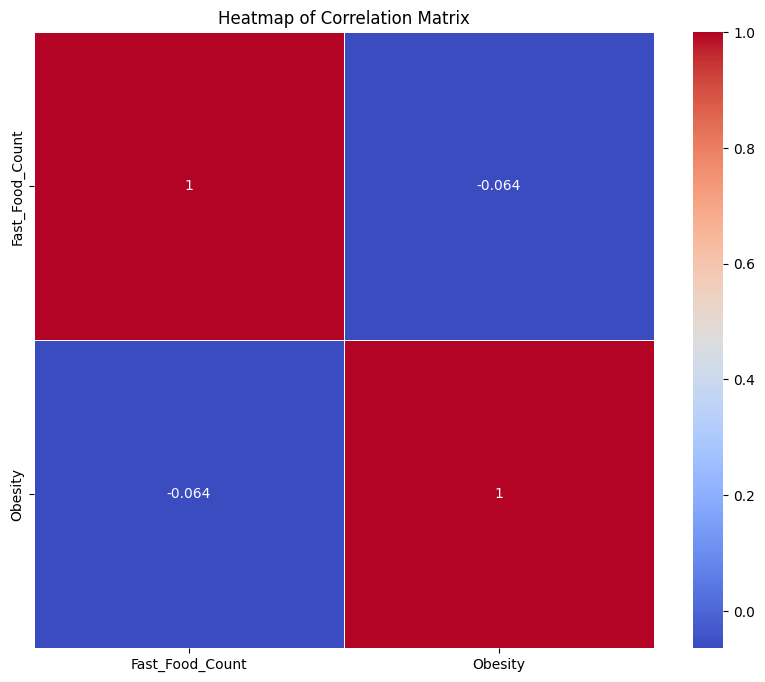

In [35]:
# want to make heatmap with nums only - visualization of above
number_df = merged_df.select_dtypes(include=['float64', 'int64'])
#corr matrix
corr_matrix = number_df.corr()

# of obesity vs fast food count
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


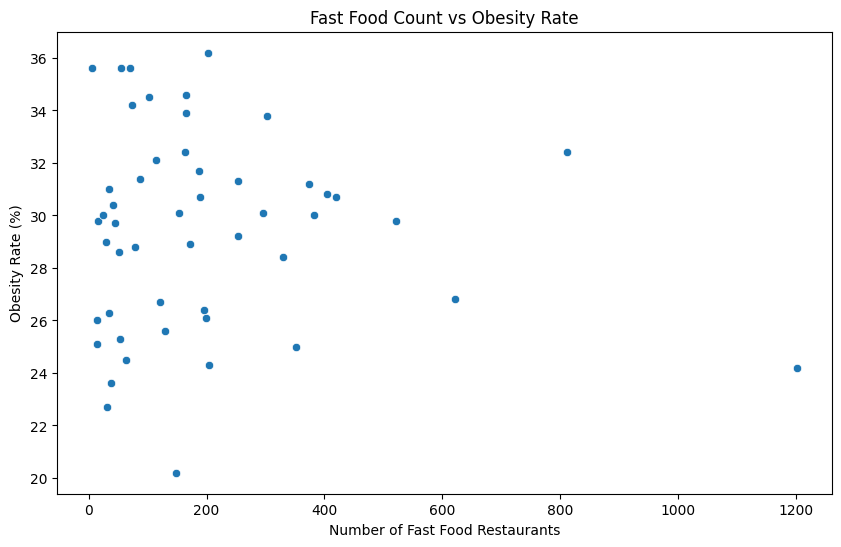

In [25]:
#visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fast_Food_Count', y='Obesity', data=merged_df)
plt.title('Fast Food Count vs Obesity Rate')
plt.xlabel('Number of Fast Food Restaurants')
plt.ylabel('Obesity Rate (%)')
plt.show()


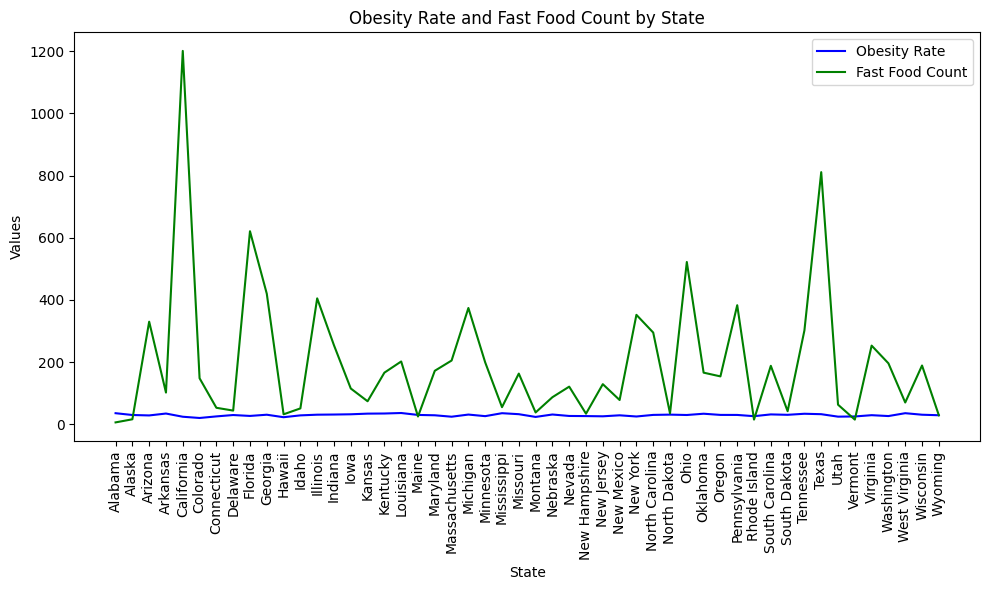

In [33]:
#line graph correlating obesity vs state
plt.figure(figsize=(10, 6))
plt.plot(merged_df['State'], merged_df['Obesity'], label='Obesity Rate', color='blue')
plt.plot(merged_df['State'], merged_df['Fast_Food_Count'], label='Fast Food Count', color='green')
#titles
plt.title('Obesity Rate and Fast Food Count by State')
plt.xlabel('State')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
print("State with the most fast food restuarants: \n", fast_food_count.max())
print("State with the least fast food restuarants: \n", fast_food_count.min())

State with the most fast food restuarants: 
 State              Wyoming
Fast_Food_Count       1201
dtype: object
State with the least fast food restuarants: 
 State              Alabama
Fast_Food_Count          6
dtype: object


In [27]:
#PCA
#scale data
scaler = StandardScaler()
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns

scaled_data = scaler.fit_transform(merged_df[numeric_columns])


# Apply PCA and reduce the data to 2 components for visualization purposes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add the PCA components to a DataFrame for easier visualization
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['State'] = merged_df['State']


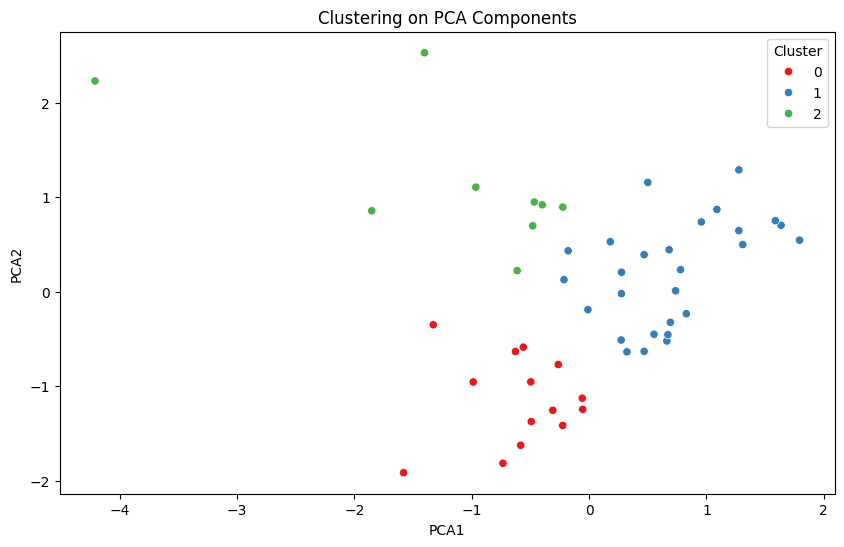

In [28]:
from sklearn.cluster import KMeans

# Perform K-Means clustering on PCA result
kmeans = KMeans(n_clusters=3)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clustering on PCA Components')
plt.show()


In [29]:
states_in_clusters = pca_df.groupby('Cluster')['State'].apply(list)

# Identifying the outlier cluster (smallest cluster by size)
outlier_cluster = pca_df['Cluster'].value_counts().idxmin()
outlier_states = pca_df[pca_df['Cluster'] == outlier_cluster]['State']

print("States in each cluster:")
print(states_in_clusters)

print("\nOutlier State(s) in the smallest cluster:")
print(outlier_states.tolist())

States in each cluster:
Cluster
0    [Colorado, Connecticut, Hawaii, Massachusetts,...
1    [Alabama, Alaska, Arkansas, Delaware, Idaho, I...
2    [Arizona, California, Florida, Georgia, Illino...
Name: State, dtype: object

Outlier State(s) in the smallest cluster:
['Arizona', 'California', 'Florida', 'Georgia', 'Illinois', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']


#Modelling

In [30]:
#making model to try and predict outcome of obesity based on state - prob wont work because before found that there was a negative correaltion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split
X = merged_df[['Fast_Food_Count']]
y = merged_df['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using linear basic
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

#get accuracy if possible

thresholds = [0, 25, 30]  # Example: 0-25 = Low, 25-30 = Medium, 30+ = High
categories = ['Low', 'Medium', 'High']

# Convert predictions to categories
y_pred_categories = np.digitize(y_pred, thresholds, right=True)
y_pred_labels = [categories[i-1] for i in y_pred_categories]

# Convert true values to categories for comparison
y_test_categories = np.digitize(y_test, thresholds, right=True)
y_test_labels = [categories[i-1] for i in y_test_categories]

# Calculate accuracy
accuracy = np.mean(np.array(y_pred_labels) == np.array(y_test_labels))
print(f'Accuracy: {accuracy:.2f}')


Mean Squared Error: 10.116688933706932
R-squared: -0.13201321864482418
Accuracy: 0.30


bad model but expected because there wasn't really a correlation to be found between the two variables